# ***Titanic Dataset.***
***The Titanic dataset contains information about passengers on the Titanic, such as age, gender, ticket class, and whether they survived the disaster.***
# ***Columns***
| Column Name     | Data Type | Description                                          | Difficult Word Meaning                                                                   |
| --------------- | --------- | ---------------------------------------------------- | ---------------------------------------------------------------------------------------- |
| **PassengerId** | int64     | Unique ID for each passenger (just a number).        | **ID** = Identification number                                                           |
| **Survived**    | int64     | 0 = Did not survive, 1 = Survived.                   | **Survived** = Stayed alive                                                              |
| **Pclass**      | int64     | Ticket class: 1 = 1st class, 2 = 2nd, 3 = 3rd.       | **Class** = Level (rich/poor)                                                            |
| **Name**        | object    | Full name of the passenger.                          | —                                                                                        |
| **Sex**         | object    | Gender → male or female.                             | **Sex** = Gender                                                                         |
| **Age**         | float64   | Age of the passenger in years.                       | —                                                                                        |
| **SibSp**       | int64     | Number of **siblings** or **spouses** aboard.        | **Siblings** = Brothers/sisters<br>**Spouse** = Husband/wife<br>**Aboard** = On the ship |
| **Parch**       | int64     | Number of **parents** or **children** aboard.        | —                                                                                        |
| **Ticket**      | object    | Ticket number used to board the ship.                | **Ticket** = A document to travel                                                        |
| **Fare**        | float64   | Money paid for the ticket.                           | **Fare** = Ticket price                                                                  |
| **Cabin**       | object    | Cabin/room number on the ship. (many missing values) | **Cabin** = Room on ship                                                                 |
| **Embarked**    | object    | Port (city) where the person got on the ship.        | **Embarked** = Got on the ship<br>**Port** = Place where ships stop                      |



In [1274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [1275]:
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# ***Exploratory Data Analysis.(EDA)***

In [1276]:
df.shape

(891, 12)

In [1277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1278]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1279]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1280]:
df.duplicated().sum()

np.int64(0)

In [1281]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1282]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [1283]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [1284]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [1285]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

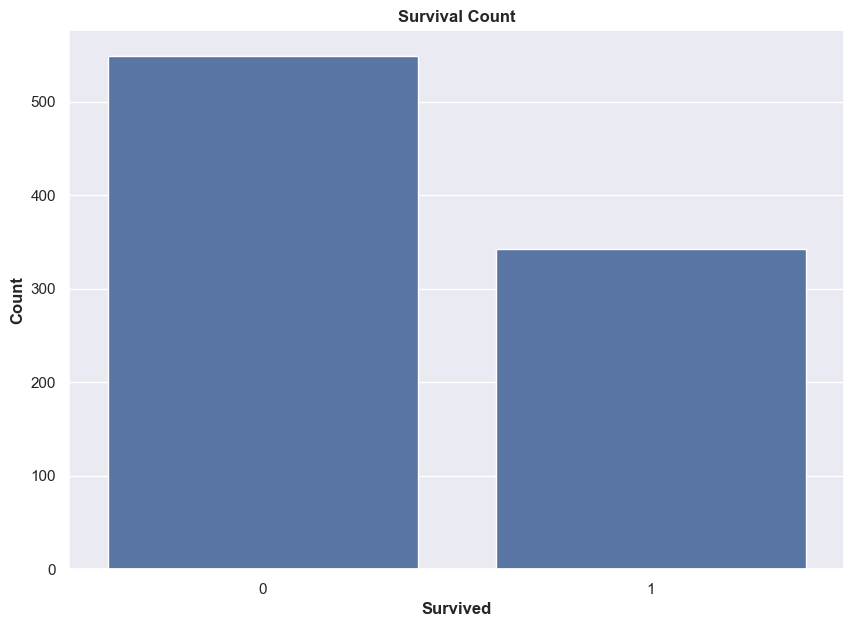

In [1286]:
plt.figure(figsize=(10,7))
sns.set_theme(style="darkgrid", palette="deep", context="notebook")
sns.countplot(x='Survived',data=df)
plt.title('Survival Count',fontweight='bold')
plt.xlabel('Survived',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.show()

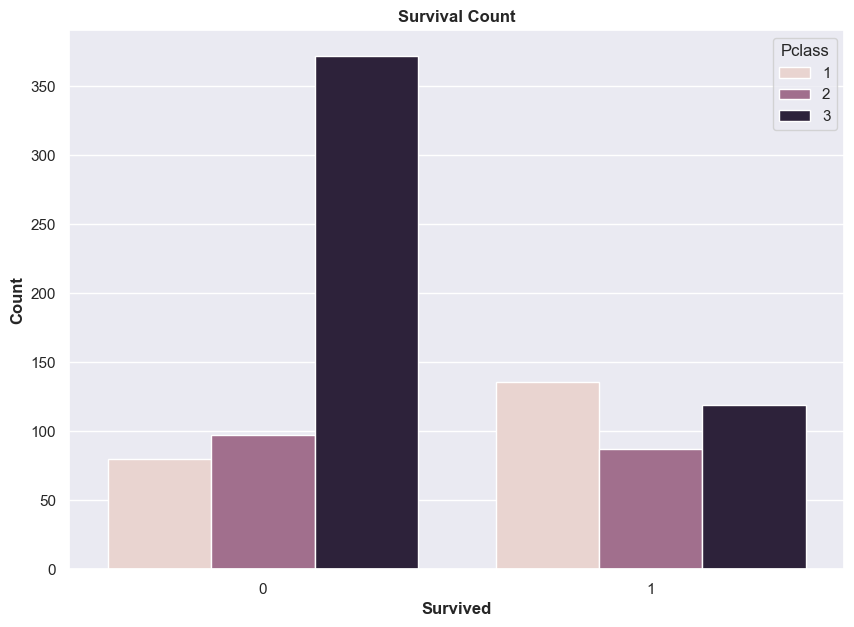

In [1287]:
plt.figure(figsize=(10,7))
sns.set_theme(style="darkgrid", palette="deep", context="notebook")
sns.countplot(x='Survived',hue='Pclass',data=df)
plt.title('Survival Count',fontweight='bold')
plt.xlabel('Survived',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.show()

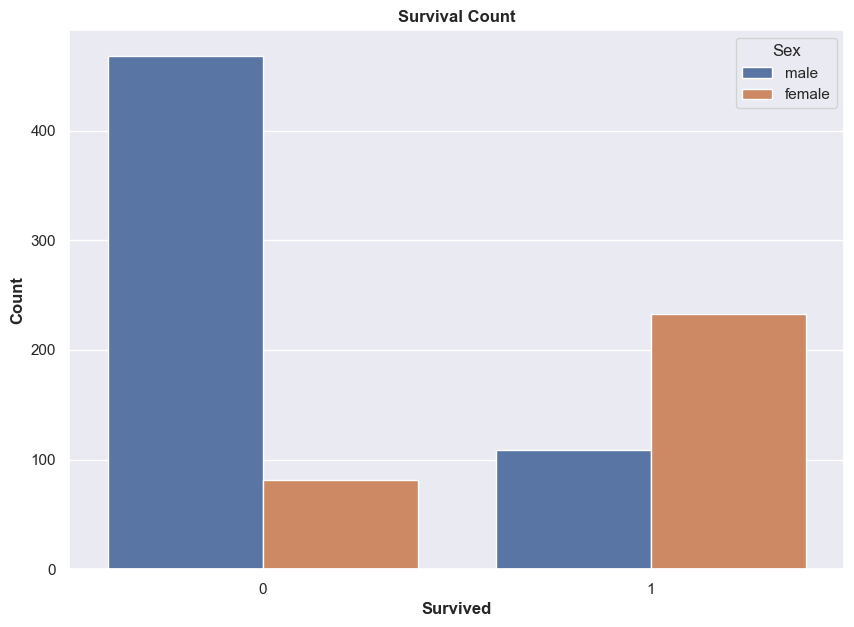

In [1288]:
plt.figure(figsize=(10,7))
sns.set_theme(style="darkgrid", palette="deep", context="notebook")
sns.countplot(x='Survived',hue='Sex',data=df)
plt.title('Survival Count',fontweight='bold')
plt.xlabel('Survived',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.show()

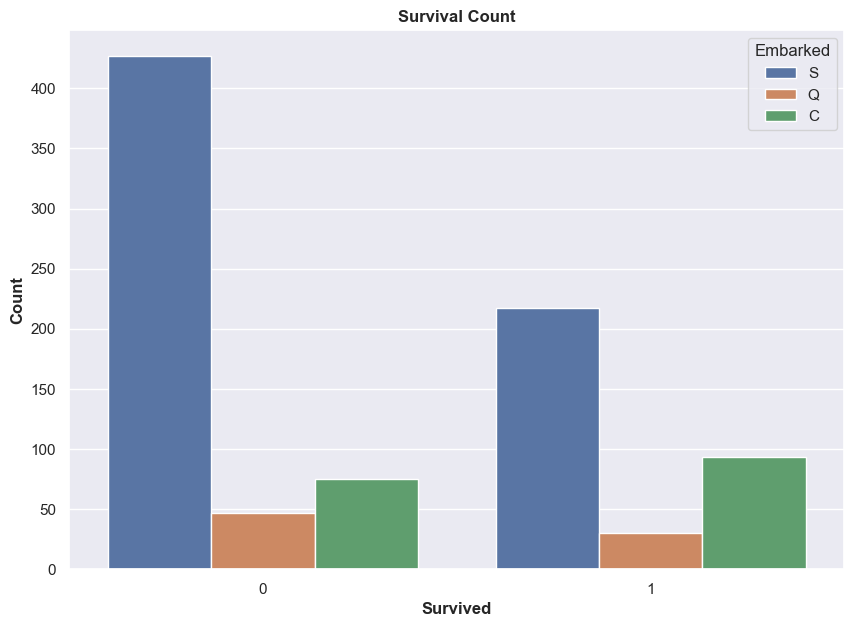

In [1289]:
plt.figure(figsize=(10,7))
sns.set_theme(style="darkgrid", palette="deep", context="notebook")
sns.countplot(x='Survived',hue='Embarked',data=df)
plt.title('Survival Count',fontweight='bold')
plt.xlabel('Survived',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.show()

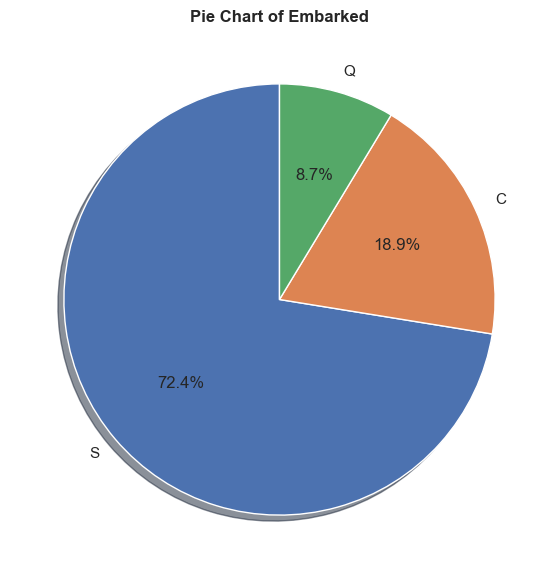

In [1290]:
plt.figure(figsize=(10,7))
plt.pie(df['Embarked'].value_counts(),
        labels=df['Embarked'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        shadow=True)
plt.title('Pie Chart of Embarked',fontweight='bold')
plt.show()          

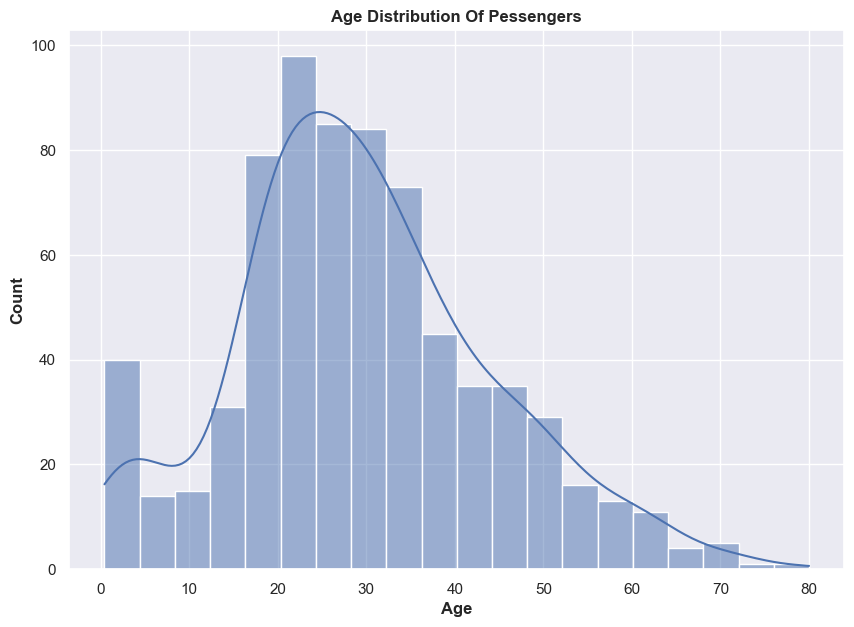

In [1291]:
plt.figure(figsize=(10,7))
sns.histplot(x='Age',data=df,kde=True)
plt.title('Age Distribution Of Pessengers',fontweight='bold')
plt.xlabel('Age',fontweight='bold')
plt.ylabel('Count',fontweight='bold')

plt.show()

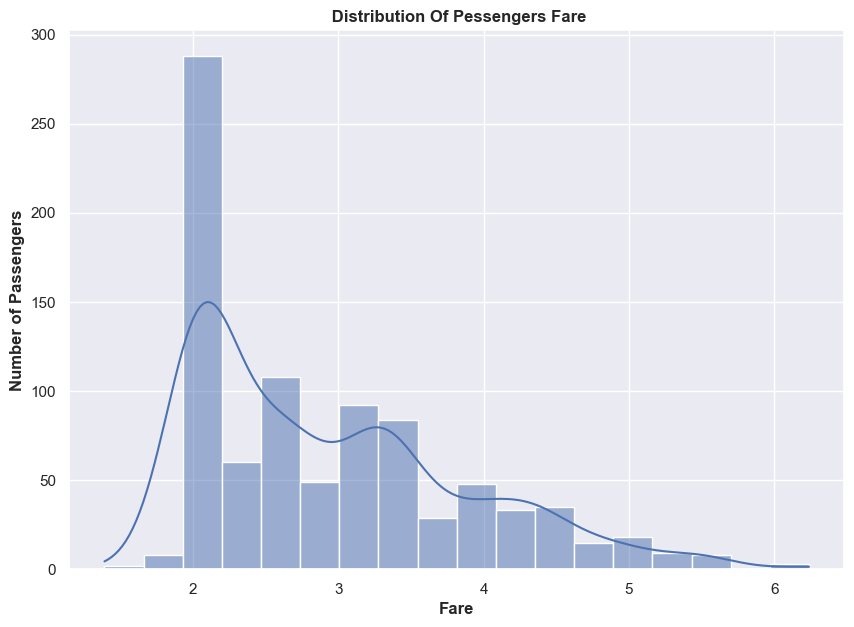

In [1292]:
plt.figure(figsize=(10,7))
sns.histplot(x='Fare',data=df1,kde=True)
plt.title(' Distribution Of Pessengers Fare',fontweight='bold')
plt.xlabel('Fare',fontweight='bold')
plt.ylabel('Number of Passengers',fontweight='bold')

plt.show()

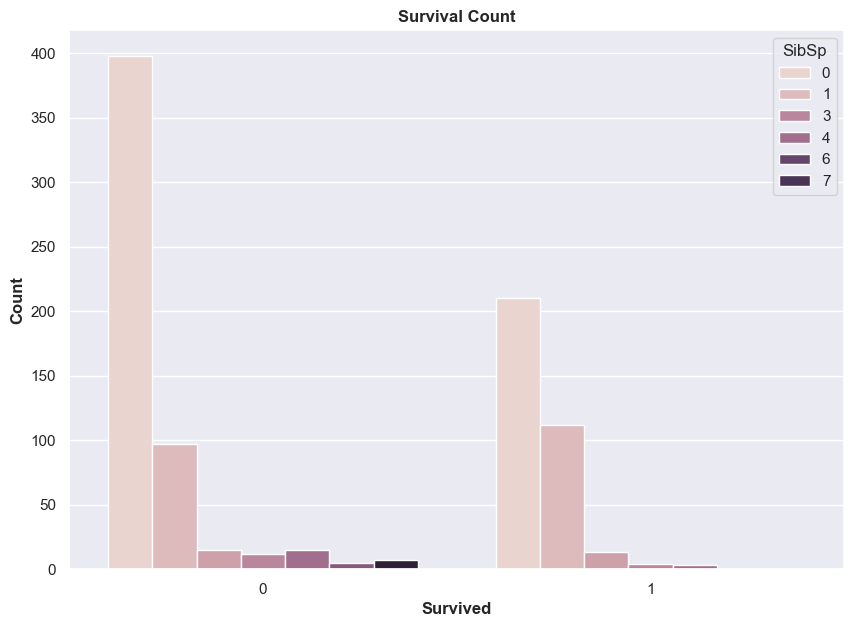

In [1293]:
plt.figure(figsize=(10,7))
sns.set_theme(style="darkgrid", palette="deep", context="notebook")
sns.countplot(x='Survived',hue='SibSp',data=df)
plt.title('Survival Count',fontweight='bold')
plt.xlabel('Survived',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.show()

# ***Feature Engineering.***

In [1294]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1295]:
df1 = df.copy()

In [1296]:
df1.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [1297]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [1298]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [1299]:
df1['Age'] = df1['Age'].fillna(df1['Age'].median())

In [1300]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

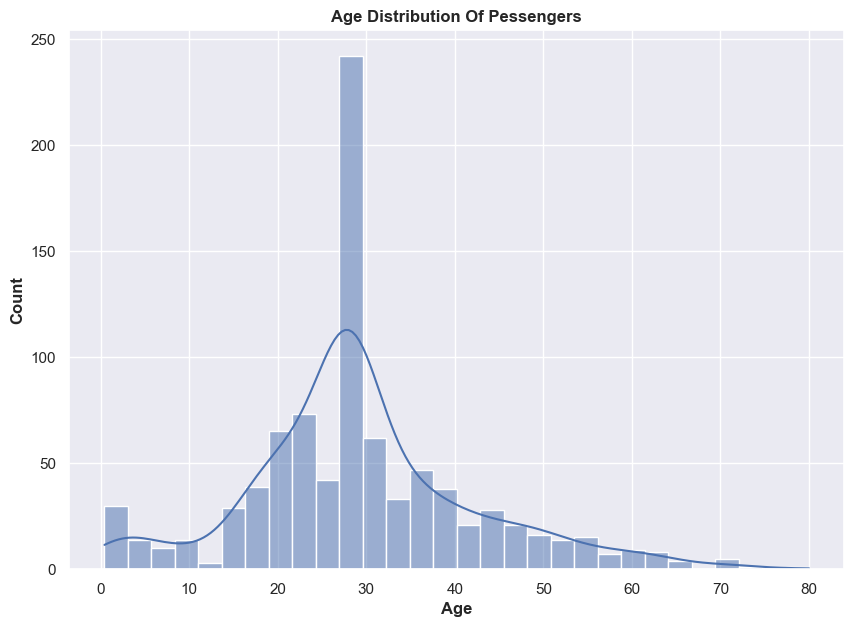

In [1301]:
plt.figure(figsize=(10,7))
sns.histplot(x='Age',data=df1,kde=True)
plt.title('Age Distribution Of Pessengers',fontweight='bold')
plt.xlabel('Age',fontweight='bold')
plt.ylabel('Count',fontweight='bold')

plt.show()

In [1302]:

df1['Fare'] = np.log(df1['Fare'])
df1['Fare'].replace(-np.inf, np.nan, inplace=True)

df1['Fare'].fillna(df1['Fare'].median(), inplace=True)

In [1303]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,1.981001,S
1,1,1,female,38.0,1,0,4.266662,C
2,1,3,female,26.0,0,0,2.070022,S
3,1,1,female,35.0,1,0,3.972177,S
4,0,3,male,35.0,0,0,2.085672,S


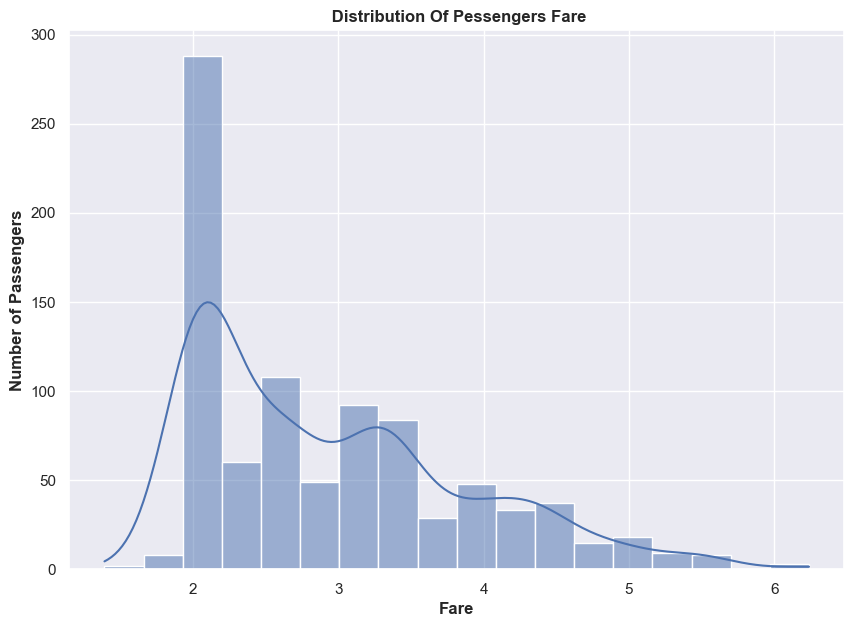

In [1304]:
plt.figure(figsize=(10,7))
sns.histplot(x='Fare',data=df1,kde=True)
plt.title(' Distribution Of Pessengers Fare',fontweight='bold')
plt.xlabel('Fare',fontweight='bold')
plt.ylabel('Number of Passengers',fontweight='bold')

plt.show()

In [1305]:
df1['Sex'] = df1['Sex'].map({'male':0,'female':1})



In [1306]:
df1['Sex'].value_counts()

Sex
0    577
1    314
Name: count, dtype: int64

In [1307]:
df1['Sex'].unique()

array([0, 1])

In [1308]:
df1.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [1309]:
df1['Sex']=df1['Sex'].astype(int)

In [1310]:
df1.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [1311]:
df1['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [1312]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,1.981001,S
1,1,1,1,38.0,1,0,4.266662,C
2,1,3,1,26.0,0,0,2.070022,S
3,1,1,1,35.0,1,0,3.972177,S
4,0,3,0,35.0,0,0,2.085672,S


In [1313]:
df1[df1.isnull().any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,1,38.0,0,0,4.382027,NaN
829,1,1,1,62.0,0,0,4.382027,NaN


In [1314]:
df1.dropna(subset='Embarked',inplace=True)
df1.reset_index(drop=True,inplace=True)

In [1315]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,1.981001,S
1,1,1,1,38.0,1,0,4.266662,C
2,1,3,1,26.0,0,0,2.070022,S
3,1,1,1,35.0,1,0,3.972177,S
4,0,3,0,35.0,0,0,2.085672,S


In [1316]:
df1 = pd.get_dummies(df1,columns=['Embarked'],dtype=int)

In [1317]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,1.981001,0,0,1
1,1,1,1,38.0,1,0,4.266662,1,0,0
2,1,3,1,26.0,0,0,2.070022,0,0,1
3,1,1,1,35.0,1,0,3.972177,0,0,1
4,0,3,0,35.0,0,0,2.085672,0,0,1


In [1318]:
df1.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_C      int64
Embarked_Q      int64
Embarked_S      int64
dtype: object

In [1319]:
df1['Age']=df1['Age'].astype(int)

In [1320]:
df1.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age             int64
SibSp           int64
Parch           int64
Fare          float64
Embarked_C      int64
Embarked_Q      int64
Embarked_S      int64
dtype: object

<Axes: ylabel='Age'>

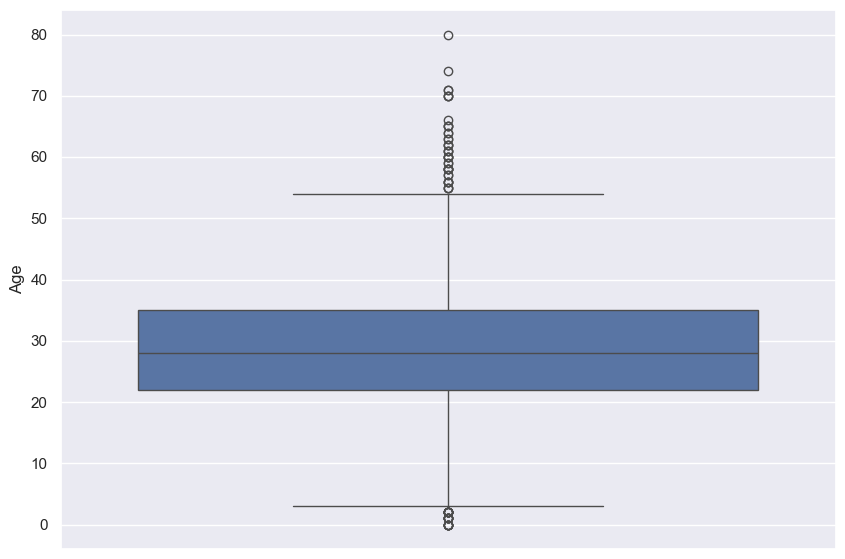

In [1321]:
plt.figure(figsize=(10,7))
sns.set_theme(style="darkgrid", palette="deep", context="notebook")
sns.boxplot(y='Age',data=df1)

<Axes: ylabel='Fare'>

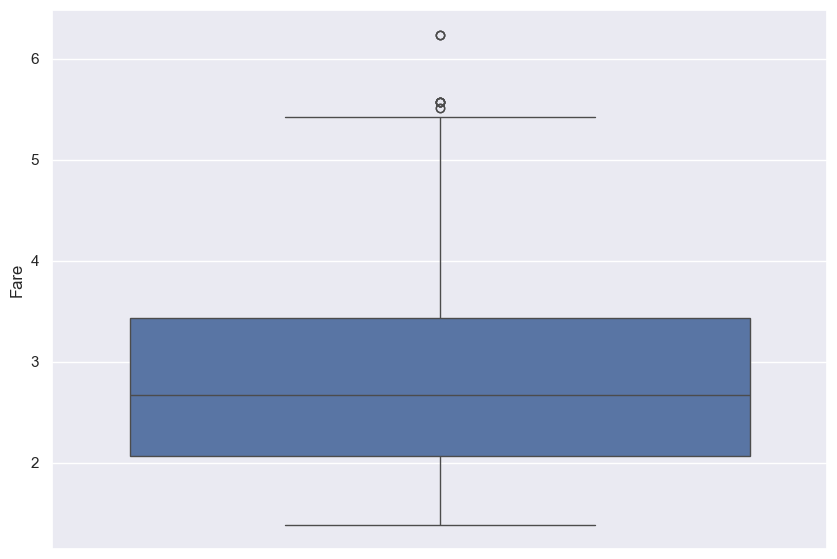

In [1322]:
plt.figure(figsize=(10,7))
sns.set_theme(style="darkgrid", palette="deep", context="notebook")
sns.boxplot(y='Fare',data=df1)

# ***Splitting The Dataset into X and y and then for training and testing.***

In [1323]:
X = df1.drop(columns=['Survived'],axis=1)
y = df1['Survived']

In [1324]:
X.shape,y.shape

((889, 9), (889,))

In [1325]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [1326]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((666, 9), (223, 9), (666,), (223,))

In [1327]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
375,3,1,22,0,0,1.981001,0,0,1
457,2,1,50,0,0,2.351375,0,0,1
731,2,0,28,0,0,2.674149,0,0,1
506,1,0,28,0,0,3.279030,0,0,1
828,3,1,15,1,0,2.670985,1,0,0
...,...,...,...,...,...,...,...,...,...
106,3,0,28,0,0,2.050913,0,0,1
270,3,0,25,0,0,2.674149,0,0,1
860,1,1,48,0,0,3.255370,0,0,1
435,3,1,21,2,2,3.537330,0,0,1


In [1328]:
X_train[['Age','Fare']]

,Age,Fare
375,22,1.981001
457,50,2.351375
731,28,2.674149
506,28,3.279030
828,15,2.670985
...,...,...
106,28,2.050913
270,25,2.674149
860,48,3.255370
435,21,3.537330


# ***Standard Scaler***

In [1329]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [1330]:
X_train[['Age','Fare']]=scaler.fit_transform(X_train[['Age','Fare']])

In [1331]:
X_test[['Age','Fare']]=scaler.transform(X_test[['Age','Fare']])

In [1332]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
375,3,1,-0.573865,0,0,-1.028805,0,0,1
457,2,1,1.550700,0,0,-0.630931,0,0,1
731,2,0,-0.118601,0,0,-0.284191,0,0,1
506,1,0,-0.118601,0,0,0.365602,0,0,1
828,3,1,-1.105006,1,0,-0.287590,1,0,0
...,...,...,...,...,...,...,...,...,...
106,3,0,-0.118601,0,0,-0.953702,0,0,1
270,3,0,-0.346233,0,0,-0.284191,0,0,1
860,1,1,1.398945,0,0,0.340185,0,0,1
435,3,1,-0.649742,2,2,0.643080,0,0,1


# ***Model Fitting***

In [1333]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [1334]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1])

Accuracy: 0.8026905829596412


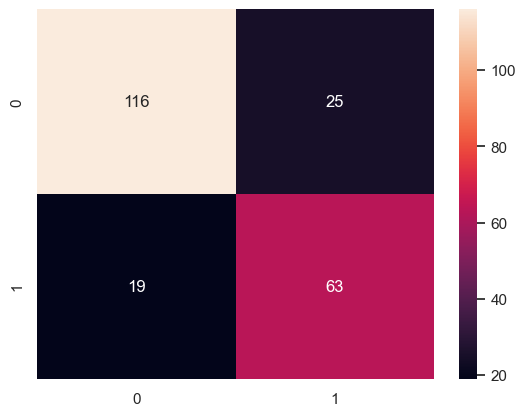

Classification_Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       141
           1       0.72      0.77      0.74        82

    accuracy                           0.80       223
   macro avg       0.79      0.80      0.79       223
weighted avg       0.81      0.80      0.80       223



In [1335]:
print('Accuracy:',accuracy_score(y_test,y_pred))
sns.set_theme(style="darkgrid", palette="deep", context="notebook")
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

print("Classification_Report:\n",classification_report(y_test,y_pred))


# ***HyperParameter Tunning***
***1.GridSearchCV*** 

In [1336]:
model = model
penalty = ['l1','l2','elasticnet']
c_val = [1.0,10,0.1,0.01,100]
solver = ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']

In [1337]:
params = dict(penalty=penalty,C=c_val,solver=solver)

In [1338]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [1.0, 10, 0.1, 0.01, 100],
 'solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga']}

In [1339]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()

In [1340]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model,param_grid=params,cv=cv,scoring='accuracy',n_jobs=-1)

In [1341]:
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1.0, 10, 0.1, 0.01, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [1342]:
y_pred1 = grid.predict(X_test)
y_pred1

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1])

In [1343]:
grid.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

In [1344]:
grid.best_score_

np.float64(0.7957468297609697)

Accuracy: 0.8026905829596412


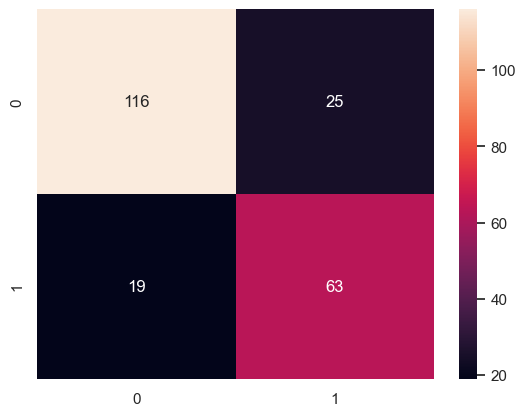

Classification_Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       141
           1       0.72      0.77      0.74        82

    accuracy                           0.80       223
   macro avg       0.79      0.80      0.79       223
weighted avg       0.81      0.80      0.80       223



In [1345]:
print('Accuracy:',accuracy_score(y_test,y_pred1))
sns.set_theme(style="darkgrid", palette="deep", context="notebook")
cm = confusion_matrix(y_test,y_pred1)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

print("Classification_Report:\n",classification_report(y_test,y_pred1))


***2.RandomizedSearchCV***

In [1346]:
from sklearn.model_selection import RandomizedSearchCV
random = RandomizedSearchCV(estimator=model,param_distributions=params,scoring='accuracy',cv=5,random_state=42)

In [1347]:
random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [1.0, 10, 0.1, 0.01, 100],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [1348]:
random.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 10}

In [1349]:
random.best_score_

np.float64(0.7957468297609697)

In [1350]:
y_pred2 = random.predict(X_test)
y_pred2

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1])

Accuracy: 0.8071748878923767


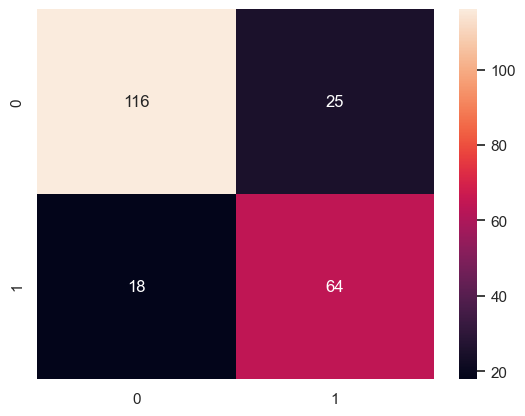

Classification_Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.84       141
           1       0.72      0.78      0.75        82

    accuracy                           0.81       223
   macro avg       0.79      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



In [1351]:
print('Accuracy:',accuracy_score(y_test,y_pred2))
sns.set_theme(style="darkgrid", palette="deep", context="notebook")
cm = confusion_matrix(y_test,y_pred2)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

print("Classification_Report:\n",classification_report(y_test,y_pred2))
